# For the stock prediction for the internship in Bharat intern i would be taking the data of Tcs from kaggle to make the stock prediction analysis.
Predicting TCS stock prices using an LSTM (Long Short-Term Memory) model is a common task in data science and can provide valuable insights for investors. I'll provide a simplified outline of the steps involved in creating an LSTM model for stock price prediction using historical TCS stock data from 2002 to 2021. Please note that this is a simplified example, and a real-world application would require extensive data preprocessing, hyperparameter tuning, and evaluation.

1. Data Collection:

Gather historical TCS stock price data for the period from 2002 to 2021. This data can be obtained from financial databases or APIs such as Yahoo Finance or Quandl.
2. Data Preprocessing:

Clean the data by handling missing values and outliers.
Create a time series dataset with features (e.g., previous stock prices) and the target variable (the next day's stock price).
3. Data Splitting:

Split the dataset into training and testing sets. Typically, 80% for training and 20% for testing is a common split.
4. Feature Scaling:

Normalize or scale the data to ensure that all features are on a similar scale. This is important for the LSTM model to converge effectively.
5. Building the LSTM Model:

Design an LSTM architecture. A simple model might consist of:
An LSTM layer with a specified number of units.
A dropout layer to prevent overfitting.
A fully connected (Dense) output layer.
Compile the model, specifying the loss function (usually mean squared error) and an optimizer (e.g., Adam).
6. Training the Model:

Train the LSTM model on the training data using historical stock prices and their corresponding target prices. Use a suitable batch size and number of epochs. Monitor the loss on the validation data.
7. Model Evaluation:

Evaluate the model's performance on the testing data, using metrics such as mean squared error (MSE) and root mean squared error (RMSE).
8. Prediction and Visualization:

Make predictions on unseen data and compare them to the actual stock prices.
Visualize the predictions alongside the actual stock prices to assess the model's accuracy.
9. Hyperparameter Tuning:

Experiment with different hyperparameters, such as the number of LSTM units, dropout rate, batch size, and learning rate, to optimize the model's performance.
10. Future Predictions:

Extend the model to make future predictions beyond the existing data by feeding it its own predictions iteratively.
Please note that stock price prediction is a complex task influenced by a wide range of factors, including economic events, news, and market sentiment. LSTM models provide a useful framework for modeling time series data, but they may not capture all factors that affect stock prices. Additionally, past performance is not indicative of future results, so stock price predictions should be used with caution in actual investment decisions.


# IMPORTING necessary LIBARIES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm

In [3]:
df=pd.read_csv('TCS_stock_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of             Date         Open         High          Low        Close   Volume  \
0     2002-08-12    28.794172    29.742206    28.794172    29.519140   212976   
1     2002-08-13    29.556316    30.030333    28.905705    29.119476   153576   
2     2002-08-14    29.184536    29.184536    26.563503    27.111877   822776   
3     2002-08-15    27.111877    27.111877    27.111877    27.111877        0   
4     2002-08-16    26.972458    28.255089    26.582090    27.046812   811856   
...          ...          ...          ...          ...          ...      ...   
4458  2021-09-24  3890.000000  3944.399902  3855.000000  3871.300049  2320754   
4459  2021-09-27  3900.000000  3904.000000  3802.899902  3836.949951  1673362   
4460  2021-09-28  3850.000000  3850.000000  3751.250000  3779.149902  2253075   
4461  2021-09-29  3759.800049  3806.000000  3722.149902  3791.899902  2489161   
4462  2021-09-30  3805.000000  3805.000000  3765.000000  3773.199951   640479

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [8]:
df.describe

<bound method NDFrame.describe of            Date         Open         High          Low        Close   Volume  \
0    2002-08-12    28.794172    29.742206    28.794172    29.519140   212976   
1    2002-08-13    29.556316    30.030333    28.905705    29.119476   153576   
2    2002-08-14    29.184536    29.184536    26.563503    27.111877   822776   
3    2002-08-15    27.111877    27.111877    27.111877    27.111877        0   
4    2002-08-16    26.972458    28.255089    26.582090    27.046812   811856   
...         ...          ...          ...          ...          ...      ...   
4458 2021-09-24  3890.000000  3944.399902  3855.000000  3871.300049  2320754   
4459 2021-09-27  3900.000000  3904.000000  3802.899902  3836.949951  1673362   
4460 2021-09-28  3850.000000  3850.000000  3751.250000  3779.149902  2253075   
4461 2021-09-29  3759.800049  3806.000000  3722.149902  3791.899902  2489161   
4462 2021-09-30  3805.000000  3805.000000  3765.000000  3773.199951   640479   

     

# Corelation of features

In [9]:
corel=df.corr()
corel

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [10]:
# Correlation of features with the target variable (Close Price)
correlation_with_close = df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


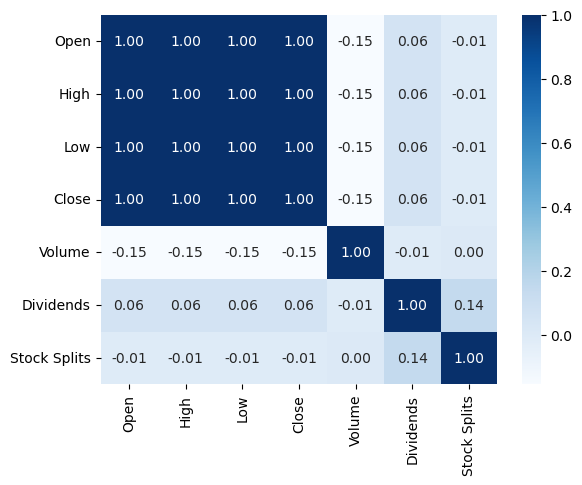

In [16]:
sns.heatmap(corel,annot= True,cmap= "Blues",fmt=".2f")
plt.show()

# Explotory Data Analysis

# Time Series of Stock prices

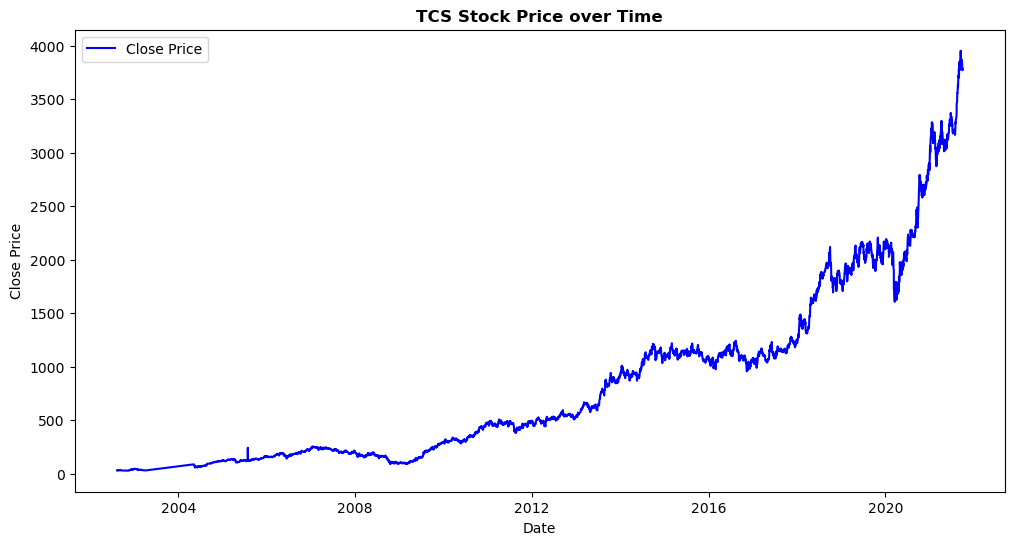

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

# Volume, Dividends of stock splits

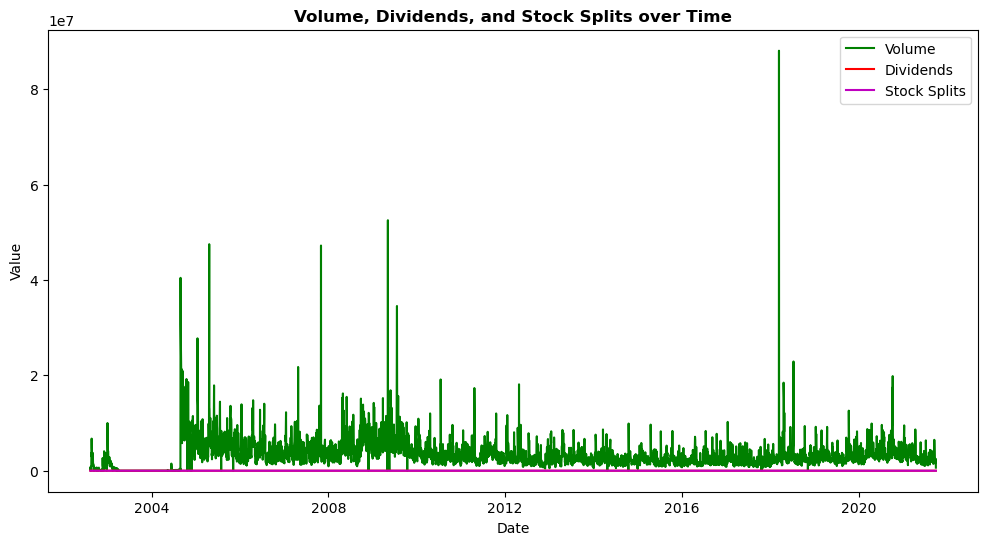

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

# close v/s volume

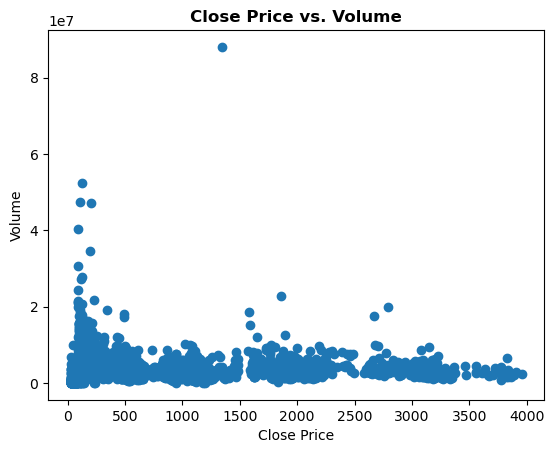

In [19]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

# Dividends v/s stock splits

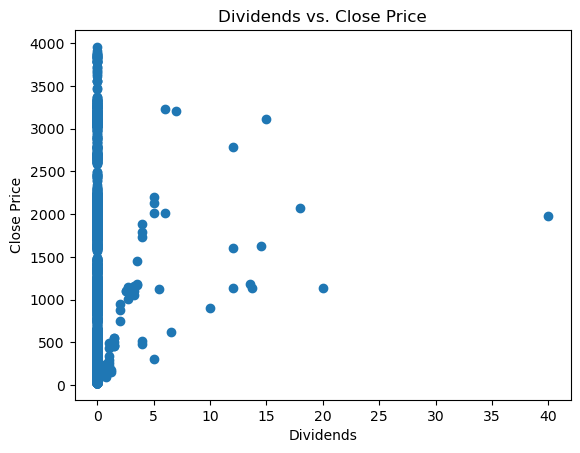

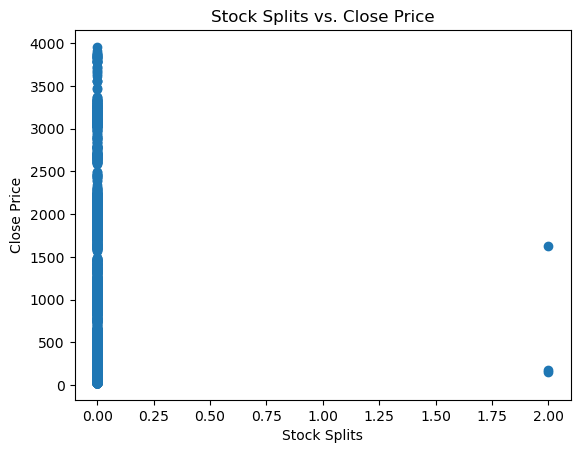

In [20]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

# Moving Averages

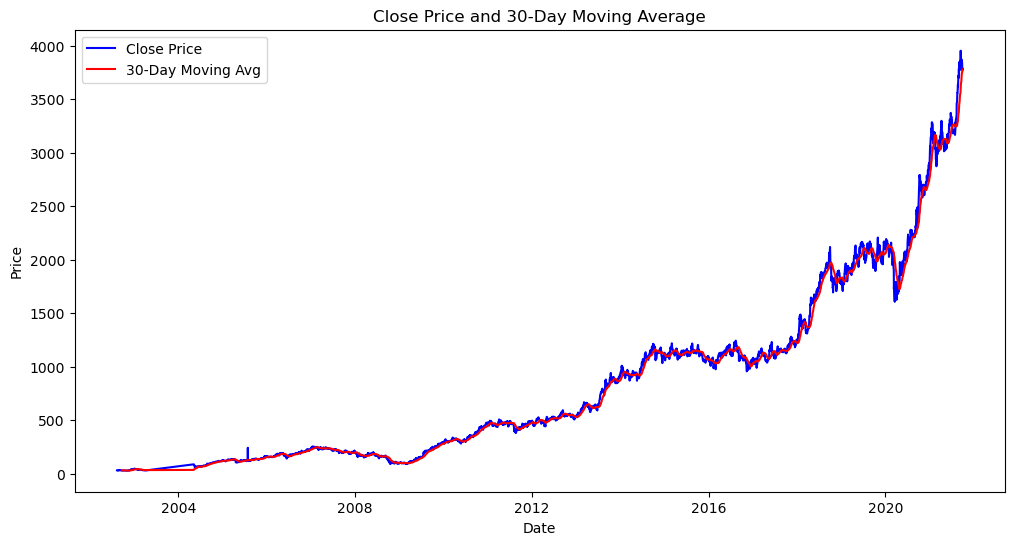

In [21]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

# Moving Average crossover strategy

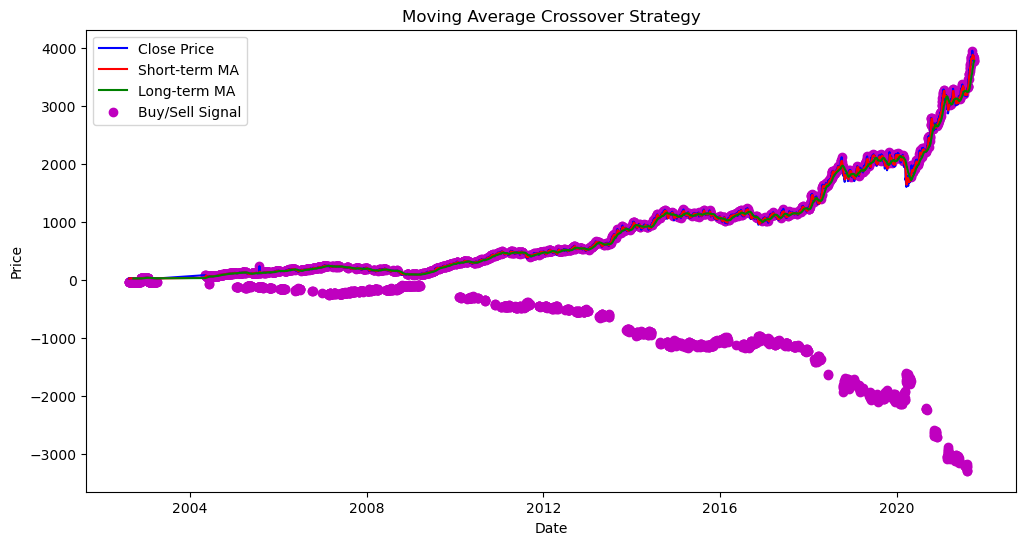

In [23]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'], label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

# Daily price change

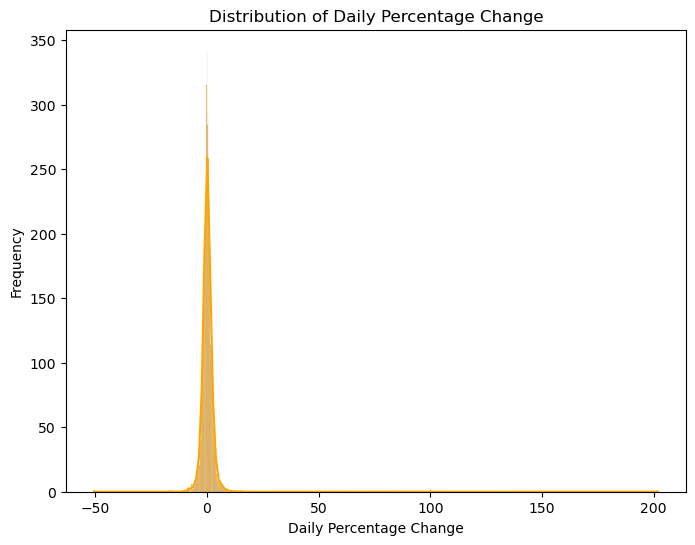

In [24]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

# Feature Engineering

In [25]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

# Modeling

In [26]:
df.shape

(4463, 14)

# Data Preparation & Normalization

In [27]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

# Reshaping Data

In [28]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

# Building LSTM Model

In [29]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size
epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:59<00:00,  1.99s/it]


# Prediction Using LSTM Model

In [30]:
lstm_predictions = model.predict(X_test_lstm).flatten()

28/28 [==============================] - 0s 877us/step


# Invese Transform of prediction

In [31]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Visualization of LSTM

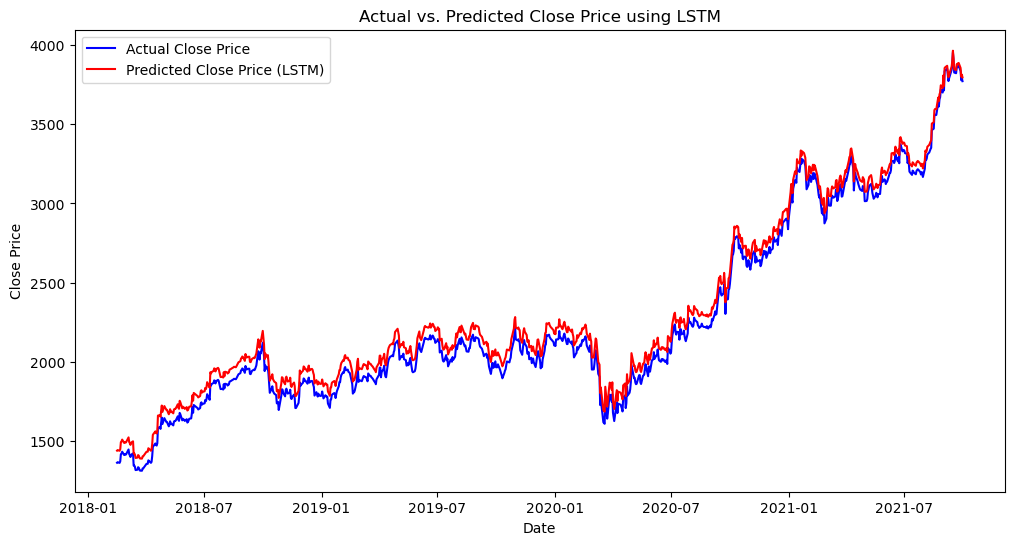

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

# Mean Absolute Error

In [33]:
lstm_mae = mean_absolute_error(test_data['Close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 69.44592175676149


In [34]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


date_index = test_data.index[-len(lstm_predictions):]  
predictions_df = pd.DataFrame({'Date': date_index, 'Predicted_Close': lstm_predictions.flatten()})


predictions_df.to_csv('predictions.csv', index=False)